In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Loading the Dataset
data = pd.read_csv('apple_products.csv')

In [5]:
# Analyse Top 5 rows of the Dataset
data.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [7]:
# let’s have a quick look at whether this dataset contains any null values
data.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [9]:
# Now, let’s have a look at the descriptive statistics of the data
data.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


#### iPhone Sales Analysis in India


In [52]:
# Now let's create a new dataframe by storing all the data about the top 10 highest-rated iPhones in India on Flipkart
highest_rated = data.sort_values(by = 'Star Rating', ascending= False)

In [54]:
highest_rated = highest_rated.head(10)

In [56]:
highest_rated['Product Name']

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object

##### According to the above data, below are the top 5 most liked iPhones in India:

1. APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
2. APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
3. APPLE iPhone 11 Pro Max (Midnight Green, 256 GB) 
4. APPLE iPhone 11 Pro Max (Gold, 64 GB)
5. APPLE iPhone 11 Pro Max (Gold, 256 GB)

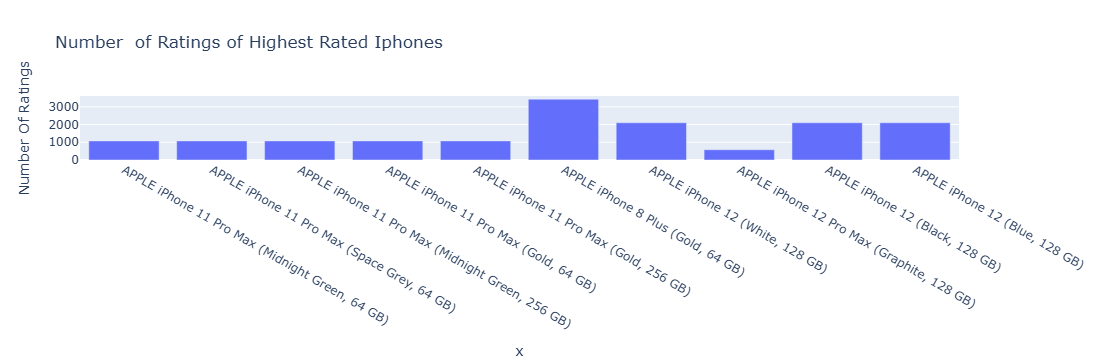

In [59]:
# Now let’s have a look at the number of ratings of the highest-rated iPhones on Flipkart
iphones = highest_rated['Product Name'].value_counts()
label = iphones.index
counts = highest_rated['Number Of Ratings']

figure = px.bar(highest_rated, x = label,
               y = counts,
               title = 'Number  of Ratings of Highest Rated Iphones')

figure.show()

##### According to the above bar graph, APPLE iPhone 8 Plus (Gold, 64 GB) has the most ratings on Flipkart.`5

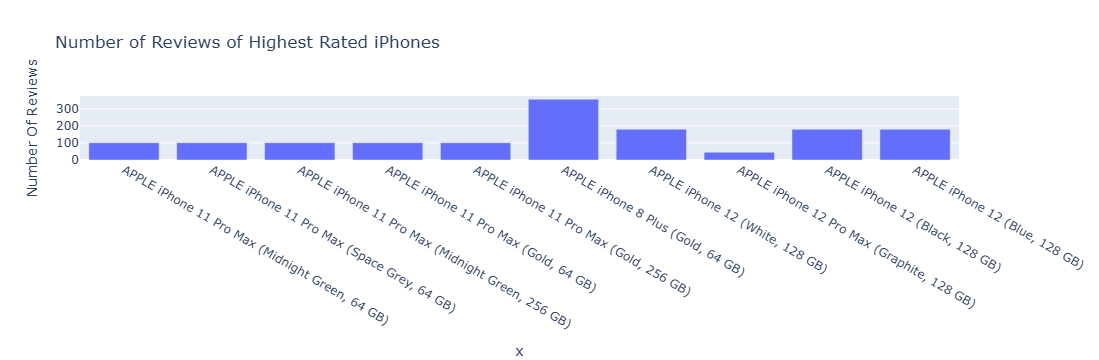

In [64]:
# Now let’s have a look at the number of reviews of the highest-rated iPhones on Flipkart
iphones = highest_rated["Product Name"].value_counts()
label = iphones.index
counts = highest_rated["Number Of Reviews"]
figure = px.bar(highest_rated, x=label, 
                y = counts, 
            title="Number of Reviews of Highest Rated iPhones")
figure.show()

##### APPLE iPhone 8 Plus (Gold, 64 GB) is also leading in the highest number of reviews on Flipkart among the highest-rated iPhones in India.

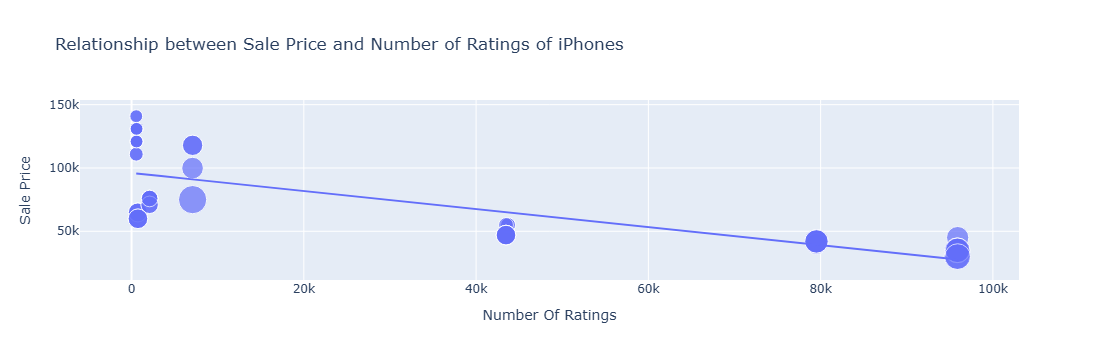

In [67]:
# Now let’s have a look at the relationship between the sale price of iPhones and their ratings on Flipkart
figure = px.scatter(data_frame = data, x="Number Of Ratings",
                    y="Sale Price", size="Discount Percentage", 
                    trendline="ols", 
                    title="Relationship between Sale Price and Number of Ratings of iPhones")
figure.show()

##### There is a negative linear relationship between the sale price of iPhones and the number of ratings. It means iPhones with lower sale prices are sold more in India.

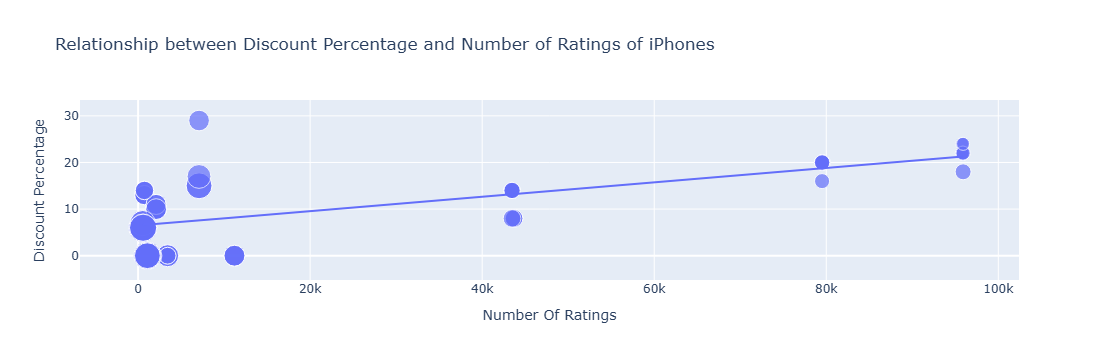

In [70]:
# Now let’s have a look at the relationship between the discount percentage on iPhones on Flipkart and the number of ratings
figure = px.scatter(data_frame = data, x="Number Of Ratings",
                    y="Discount Percentage", size="Sale Price", 
                    trendline="ols", 
                    title="Relationship between Discount Percentage and Number of Ratings of iPhones")
figure.show()

##### There is a linear relationship between the discount percentage on iPhones on Flipkart and the number of ratings. It means iPhones with high discounts are sold more in India.

#### Summary

1. APPLE iPhone 8 Plus (Gold, 64 GB) was the most appreciated iPhone in India
2. iPhones with lower sale prices are sold more in India
3. iPhones with high discounts are sold more in India